In [36]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import matplotlib.pyplot as plt

Tahap pertama yang saya lakukan adalah mengimpor beberapa pustaka penting sesuai dengan kebutuhan analisis.

Pustaka pandas digunakan untuk mengelola data dalam bentuk tabel (DataFrame),
sedangkan numpy digunakan untuk berbagai perhitungan numerik yang melibatkan matriks. Selanjutnya, PCA dari sklearn.decomposition dimanfaatkan untuk melakukan reduksi dimensi data. Modul KMeans dari sklearn.cluster digunakan untuk mengelompokkan mahasiswa berdasarkan kemiripan pola nilai. StandardScaler dari sklearn.preprocessing dipakai untuk menstandarkan data agar setiap kriteria memiliki skala yang sama sebelum dianalisis. Terakhir, saya menggunakan plotly.express dan matplotlib.pyplot untuk membuat visualisasi data yang interaktif dan memudahkan pemahaman.

In [37]:
# Load data
file_path = 'Final Data Matdis.xlsx'
df = pd.read_excel(file_path, sheet_name='Sheets')
df.head()

,NPM,NAMA,ADIL DAN AMANAH,SUKA MEMBANTU,NYAMBUNG KALAU NGOROL,ASYIK DAN MENARIK
0,24083010001,MADINA HEDY ALIFANTI,0.8,0.8,0.8,1.0
1,24083010003,MARIA DWI KURNIASIH,1.0,0.8,0.8,1.0
2,24083010005,ADINDA PUTRI RACHMAWATI,0.5,0.7,0.3,0.7
3,24083010006,AQUINA SYABITA,0.5,0.7,0.6,0.7
4,24083010007,VARID PUTRA PRATAMA,0.5,0.7,0.6,0.7


Kemudian, kode di atas berfungsi untuk memuat data dari file Excel 'Final Data Matdis.xlsx' dan menampilkan beberapa baris pertama dari DataFrame tersebut.

In [38]:
# Rename columns for convenience
df = df.rename(columns={
    'ADIL DAN AMANAH': 'A',
    'SUKA MEMBANTU': 'B',
    'NYAMBUNG KALAU NGOROL': 'C',
    'ASYIK DAN MENARIK': 'D'
})

Untuk mempermudah proses analisis, saya mengubah nama kolom pada dataset menjadi bentuk yang lebih ringkas. Seperti, kolom “ADIL DAN AMANAH” diubah menjadi “A”, “SUKA MEMBANTU” menjadi “B”, “NYAMBUNG KALAU NGOBROL” menjadi “C”, serta “ASYIK DAN MENARIK” menjadi “D”. Penyesuaian ini bertujuan agar setiap variabel lebih mudah dipanggil pada saat perhitungan matematis maupun pemanggilan data dalam kode program.

In [39]:
# Select relevant columns
student_data = df[['NAMA', 'A', 'B', 'C', 'D']]
print("\nSelected columns preview:")
student_data.head()


Selected columns preview:


,NAMA,A,B,C,D
0,MADINA HEDY ALIFANTI,0.8,0.8,0.8,1.0
1,MARIA DWI KURNIASIH,1.0,0.8,0.8,1.0
2,ADINDA PUTRI RACHMAWATI,0.5,0.7,0.3,0.7
3,AQUINA SYABITA,0.5,0.7,0.6,0.7
4,VARID PUTRA PRATAMA,0.5,0.7,0.6,0.7


Setelah nama kolom disederhanakan, selanjutnya adalah memilih kolom yang relevan untuk dianalisis. Pada tahap ini, saya hanya menggunakan kolom NAMA, A, B, C, dan D.

In [40]:
# Define weight matrix P with equal weights
P = np.array([0.25, 0.25, 0.25, 0.25])
print("\nWeight Matrix P:")
print(P)


Weight Matrix P:
[0.25 0.25 0.25 0.25]


Pada kode ini saya mendefinisikan matriks bobot dengan nilai yang sama untuk keempat kriteria penilaian, yaitu masing-masing 0,25. Dengan bobot ini, setiap aspek penilaian dianggap sama pentingnya saat dihitung untuk menghasilkan skor total mahasiswa. Penetapan bobot seperti ini penting agar penghitungan nilai komposit bersifat adil dan seimbang tanpa memprioritaskan salah satu kriteria secara berlebihan.

In [41]:
# Calculate weighted score for each student
student_data['Score'] = student_data[['A', 'B', 'C', 'D']].values @ P
print("\nCalculated weighted scores:")
student_data[['NAMA', 'Score']]


Calculated weighted scores:


,NAMA,Score
0,MADINA HEDY ALIFANTI,0.850
1,MARIA DWI KURNIASIH,0.900
2,ADINDA PUTRI RACHMAWATI,0.550
3,AQUINA SYABITA,0.625
4,VARID PUTRA PRATAMA,0.625
5,GAITSA NAZWA KANSA,0.650
6,Mohammad Alimun Hakim,0.550
7,HIZKIA SAMHAN REZAYOSHI,0.800
8,RAVEENA AYU DESEMBER SURYOPUTRI,0.700
9,Yohanes Olvin Jun Sole,0.725


Pada tahap ini dilakukan perhitungan skor akhir setiap mahasiswa dengan mempertimbangkan bobot (prioritas) dari masing-masing kriteria A, B, C, dan D menggunakan rumus: 𝑆𝑐𝑜𝑟𝑒=𝐶×𝑃

dengan:
* 𝑆𝑐𝑜𝑟𝑒 = vektor skor mahasiswa ukuran 𝑛×1,
* 𝐶 = matriks nilai mahasiswa ukuran 𝑛×4,
* 𝑃 = vektor bobot ukuran 4×1.

Langkah ini menghasilkan skor komposit yang mencerminkan performa keseluruhan mahasiswa berdasarkan empat aspek penilaian.

In [42]:
# Select top 4 students based on Score
top4_students = student_data.nlargest(4, 'Score')
print("\nTop 4 Students based on weighted score:")
top4_students[['NAMA', 'Score']]


Top 4 Students based on weighted score:


,NAMA,Score
14,FANNY WIDYA CAHYANI,0.950
19,Angelina Nirmala Puteri Dika Praktiko,0.925
1,MARIA DWI KURNIASIH,0.900
20,MAULIDA APRILIA PUTRI HANDAYANI,0.900


Dari proses perhitungan sebelumnya, pada tahap ini saya memilih empat mahasiswa dengan skor tertinggi untuk memperoleh gambaran mahasiswa terbaik secara objektif sesuai data yang ada.

In [43]:
# Calculate covariance matrix
cov_mat = np.cov(student_data[['A','B','C','D']].values, rowvar=False, ddof=1)

# Plot the covariance matrix as a heatmap
fig_cov = px.imshow(cov_mat,
                    text_auto=True,
                    labels=dict(x="Criteria", y="Criteria", color="Covariance"),
                    title="Covariance Matrix Heatmap",
                    color_continuous_scale=[(0, '#1B602F'), (0.5, 'rgb(255, 255, 204)'), (1, '#F784C5')])
fig_cov.show()

Proses selanjutnya yaitu menghitung matriks kovarians dari nilai empat kriteria mahasiswa, yang mengukur seberapa besar variabilitas dan hubungan bersama antar kriteria tersebut. Fungsi np.cov menghasilkan matriks yang menunjukkan apakah perubahan suatu kriteria berhubungan positif atau negatif dengan kriteria lain. Saya juga memvisualisasikan nilai matriks kovarians kedalam bentuk heatmap interaktif menggunakan Plotly Express. Heatmap ini sangat membantu dalam memahami hubungan antar kriteria secara visual dan intuitif.

In [44]:
# Calculate correlation matrix
corr_mat = np.corrcoef(student_data[['A','B','C','D']].values, rowvar=False)

# Plot the correlation matrix as a heatmap
fig_corr = px.imshow(corr_mat,
                     text_auto=True,
                     labels=dict(x="Criteria", y="Criteria", color="Correlation"),
                     title="Correlation Matrix Heatmap",
                     color_continuous_scale=[(0, '#1B602F'), (0.5, 'rgb(255, 255, 204)'), (1, '#F784C5')],
                     range_color=[-1, 1])
fig_corr.show()

Setelah kovarians, langkah berikutnya adalah menghitung matriks korelasi yang mengukur kekuatan dan arah hubungan linear antar kriteria penilaian mahasiswa. Dengan menggunakan fungsi np.corrcoef, matriks korelasi diperoleh sehingga semua nilai berada dalam rentang -1 hingga 1, memudahkan interpretasi tingkat keterkaitan antar variabel. Hasil ini juga saya visualisasikan dalam bentuk heatmap interaktif menggunakan Plotly Express, yang menampilkan korelasi antara kriteria dengan warna dan nilai numerik pada setiap sel, sehingga analisis pola hubungan antar kriteria menjadi lebih jelas dan intuitif.

In [45]:
# Calculate cosine similarity matrix
X_matrix = student_data[['A','B','C','D']].values
norms = np.linalg.norm(X_matrix, axis=1, keepdims=True)
cosine_sim = (X_matrix @ X_matrix.T) / (norms @ norms.T)
cosine_df = pd.DataFrame(cosine_sim, index=student_data['NAMA'], columns=student_data['NAMA'])
print("\nCosine Similarity Matrix:")
display(cosine_df)


Cosine Similarity Matrix:


NAMA,MADINA HEDY ALIFANTI,MARIA DWI KURNIASIH,ADINDA PUTRI RACHMAWATI,AQUINA SYABITA,VARID PUTRA PRATAMA,GAITSA NAZWA KANSA,Mohammad Alimun Hakim,HIZKIA SAMHAN REZAYOSHI,RAVEENA AYU DESEMBER SURYOPUTRI,Yohanes Olvin Jun Sole,...,ESTHI NURANI SRI HANDAYANI,Muhammad Naufal Asruzzaman,Laudya Meitaneia Sianturi,ADRIAN VEDA DARMAWAN,SELVY DWI YULITA SARI,Rizky Faza Hafiyyan Nusantara,Indra Maulana R F Y,YUNIAR RACHMAWATI,KIKY MAUDRY NATASYA,NAJWA SOFIA
NAMA,,,,,,,,,,,,,,,,,,,,,
MADINA HEDY ALIFANTI,1.000000,0.995228,0.967777,0.993170,0.993170,0.993761,0.998508,0.997854,0.998130,0.999123,...,0.992159,0.987302,0.996207,0.987302,0.993170,0.993170,0.993170,0.996433,0.993761,0.993170
MARIA DWI KURNIASIH,0.995228,1.000000,0.961183,0.980872,0.980872,0.979500,0.991704,0.989260,0.988851,0.995917,...,0.994637,0.985290,0.992167,0.985290,0.989630,0.989630,0.989630,0.986782,0.987872,0.989630
ADINDA PUTRI RACHMAWATI,0.967777,0.961183,1.000000,0.973271,0.973271,0.976563,0.969223,0.957155,0.964951,0.964712,...,0.933815,0.931891,0.953487,0.931891,0.931855,0.931855,0.931855,0.955349,0.936972,0.931855
AQUINA SYABITA,0.993170,0.980872,0.973271,1.000000,1.000000,0.998010,0.989932,0.989697,0.997567,0.993646,...,0.976893,0.964875,0.981269,0.964875,0.981132,0.981132,0.981132,0.987641,0.979974,0.981132
VARID PUTRA PRATAMA,0.993170,0.980872,0.973271,1.000000,1.000000,0.998010,0.989932,0.989697,0.997567,0.993646,...,0.976893,0.964875,0.981269,0.964875,0.981132,0.981132,0.981132,0.987641,0.979974,0.981132
GAITSA NAZWA KANSA,0.993761,0.979500,0.976563,0.998010,0.998010,1.000000,0.993957,0.992912,0.996700,0.991603,...,0.974002,0.971540,0.985817,0.971540,0.979974,0.979974,0.979974,0.992116,0.982759,0.979974
Mohammad Alimun Hakim,0.998508,0.991704,0.969223,0.989932,0.989932,0.993957,1.000000,0.998645,0.995591,0.995345,...,0.987256,0.990618,0.997919,0.990618,0.989932,0.989932,0.989932,0.998322,0.993957,0.989932
HIZKIA SAMHAN REZAYOSHI,0.997854,0.989260,0.957155,0.989697,0.989697,0.992912,0.998645,1.000000,0.996650,0.995231,...,0.990142,0.992185,0.998137,0.992185,0.994596,0.994596,0.994596,0.999773,0.997595,0.994596
RAVEENA AYU DESEMBER SURYOPUTRI,0.998130,0.988851,0.964951,0.997567,0.997567,0.996700,0.995591,0.996650,1.000000,0.998059,...,0.988369,0.979929,0.991352,0.979929,0.991931,0.991931,0.991931,0.995050,0.991313,0.991931


Selanjutnya adalah tahap **menghitung cosine similarity** untuk mengetahui tingkat kemiripan antar mahasiswa berdasarkan nilai mereka pada kriteria A, B, C, dan D. Proses ini dilakukan dengan cara memperlakukan setiap mahasiswa sebagai sebuah vektor dalam ruang empat dimensi, kemudian dihitung seberapa dekat arah vektor satu mahasiswa dengan mahasiswa lainnya.

Cosine similarity merupakan ukuran kesamaan yang menggunakan nilai kosinus dari sudut antara dua vektor. Rumusnya dapat dituliskan sebagai berikut:

$$
\text{CosineSimilarity}(x, y) = \frac{x \cdot y}{\|x\| \times \|y\|}
$$

dengan:

* $x \cdot y$ = perkalian titik (*dot product*) antara vektor nilai mahasiswa $x$ dan $y$,
* $\|x\|$ dan $\|y\|$ = panjang (*norm*) masing-masing vektor.

Hasil perhitungan akan menghasilkan nilai antara 0 hingga 1. Nilai yang mendekati 1 menunjukkan bahwa dua mahasiswa memiliki pola nilai yang mirip, sedangkan nilai mendekati 0 menunjukkan bahwa profil keduanya sangat berbeda.

Dengan cara ini, kita bisa mengidentifikasi mahasiswa yang memiliki karakteristik penilaian yang serupa maupun berbeda, sehingga memberikan gambaran hubungan antar mahasiswa secara lebih menyeluruh.

In [46]:
# Perform PCA (2 components)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_matrix)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
print("\nPCA Explained Variance Ratio:")
print(pca.explained_variance_ratio_)


PCA Explained Variance Ratio:
[0.71705095 0.13651525]


Kode di atas bertujuan untuk melakukan reduksi dimensi data menggunakan metode Principal Component Analysis (PCA).

Reduksi dimensi data adalah proses menyederhanakan data dengan cara mengurangi jumlah variabel (fitur) tetapi tetap mempertahankan informasi terpenting di dalamnya. Hal ini berguna agar data lebih mudah divisualisasikan, lebih cepat dihitung, dan mengurangi kebisingan (noise).

Principal Component Analysis (PCA) sendiri adalah metode statistik yang mentransformasikan data ke dalam sumbu baru yang disebut komponen utama (principal components). Komponen ini dibentuk sedemikian rupa sehingga:
* Komponen pertama (PC1) menjelaskan variasi terbesar dalam data.
* Komponen kedua (PC2) menjelaskan variasi terbesar kedua, dan seterusnya.
* Setiap komponen saling ortogonal (tidak berkorelasi).

Dari perhitungan di atas, saya mendapatkan hasil:
* Komponen 1 (PC1): menjelaskan 0.71705095(71,7%) variasi data.
* Komponen 2 (PC2): menjelaskan 0.13651525(13,6%) variasi data.

Artinya, dengan hanya 2 komponen utama, kita sudah berhasil merangkum sekitar 85,3% informasi dari keseluruhan data awal.

In [47]:
# Perform KMeans clustering with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_pca)
print("\nKMeans Cluster Counts:")
print(np.bincount(kmeans_labels))


KMeans Cluster Counts:
[13 27]


Kode di atas merupakan proses melakukan pengelompokan data menggunakan algoritma K-Means Clustering. Analisis K-Means Clustering ini bertujuan untuk mengelompokkan data mahasiswa ke dalam dua kelompok (cluster) berdasarkan kemiripan nilai penilaian mereka.

K-Means adalah algoritma ML yang bekerja dengan cara menentukan jumlah cluster, menginisialisasi titik pusat cluster (centroid), kemudian mengelompokkan data berdasarkan jarak setiap data ke centroid terdekat. Setelah itu, posisi centroid diperbarui berdasarkan rata-rata data dalam cluster, dan proses ini diulang hingga posisi centroid stabil. Pada hasil analisis ini, ditemukan dua cluster utama, yaitu Cluster 0 dengan 13 mahasiswa dan Cluster 1 dengan 27 mahasiswa, yang mencerminkan segmentasi kelompok mahasiswa berdasarkan kesamaan karakteristik penilaian pada indikator yang digunakan.

In [48]:
# Append PCA and cluster results to dataframe
student_data['PCA1'] = X_pca[:, 0]
student_data['PCA2'] = X_pca[:, 1]
student_data['Cluster'] = kmeans_labels.astype(str)

Kode di atas menambahkan hasil **PCA** dan **K-Means** ke tabel `student_data`. Kolom **`PCA1`** dan `PCA2` menyimpan nilai proyeksi mahasiswa pada dua komponen utama PCA, sedangkan kolom `Cluster` menunjukkan hasil pengelompokan dari K-Means. Dengan tambahan ini, setiap mahasiswa tidak hanya memiliki nilai awal, tetapi juga posisi dalam ruang PCA dan kategori cluster yang memudahkan analisis maupun visualisasi.

In [49]:
# Interactive PCA scatter plot with clusters using plotly express
fig_pca = px.scatter(student_data, x='PCA1', y='PCA2', color='Cluster', hover_name='NAMA',
                     title='PCA Scatter Plot with KMeans Clusters',
                     labels={'PCA1': 'Principal Component 1', 'PCA2': 'Principal Component 2'},
                     color_discrete_map={'0': '#1B602F', '1': '#F784C5'})
fig_pca.show()

Kode di atas digunakan untuk membuat visualisasi scatter plot interaktif hasil reduksi dimensi dengan Principal Component Analysis (PCA), dimana sumbu-X dan sumbu-Y masing-masing merepresentasikan komponen utama pertama (PCA1) dan kedua (PCA2).

Scatter plot PCA dengan cluster KMeans menunjukkan dua cluster berbeda yang ditandai dengan warna hijau dan merah muda. Cluster 0 berwarna hijau memiliki nilai Principal Component 1 yang lebih besar dengan titik-titik data terdistribusi di sekitar nilai positif pada sumbu x dan y. Sedangkan Cluster 1 berwarna merah muda memiliki nilai Principal Component 1 pada kisaran negatif, dengan nilai Principal Component 2 bervariasi di antara positif dan negatif. Contohnya, titik data "ADINDA PUTRI RACHMAWATI" yang masuk dalam Cluster 1, dengan nilai Principal Component 1 sebesar -2.823429 dan Principal Component 2 sebesar 1.670638, menggambarkan posisi titik tersebut di kuadran kiri atas. Visualisasi ini membantu membedakan kelompok data berdasarkan hasil reduksi dimensi dari analisis komponen utama.

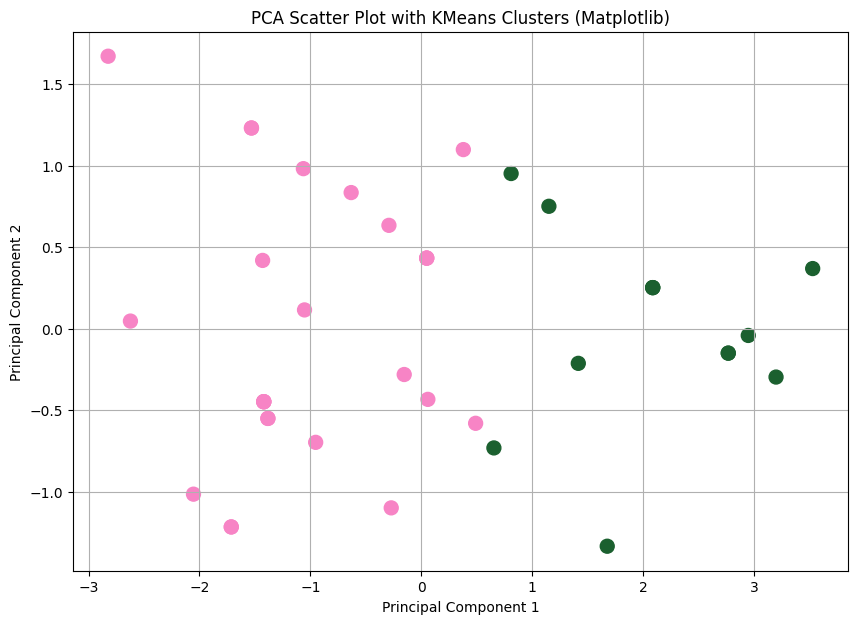

In [50]:
# Interactive PCA scatter plot with clusters using matplotlib
plt.figure(figsize=(10, 7))
colors = ['#1B602F' if label == 0 else '#F784C5' for label in kmeans_labels]
plt.scatter(x=student_data['PCA1'], y=student_data['PCA2'], c=colors, s=100)

plt.title('PCA Scatter Plot with KMeans Clusters (Matplotlib)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

Plot di atas merupakan visualisasi yang sama dengan plot interaktif sebelumnya, namun kali ini menggunakan library matplotlib.pyplot. Tujuannya adalah untuk menunjukkan bahwa meskipun menggunakan library yang berbeda, hasil visualisasi klaster berdasarkan PCA tetap konsisten, memvalidasi hasil pengelompokan yang diperoleh.

In [51]:
# Interactive cosine similarity heatmap
fig_heatmap = px.imshow(cosine_df,
                        labels=dict(x='Student', y='Student', color='Cosine Similarity'),
                        x=cosine_df.columns, y=cosine_df.index,
                        title='Cosine Similarity Heatmap Among Students',
                        color_continuous_scale=[(0, '#1B602F'), (0.95, 'rgb(255, 255, 204)'), (1, '#F784C5')],
                        width=800, height=700,
                        range_color=[0, 1])
fig_heatmap.show()

Bagian terakhir merupakan visualisasi heatmap interaktif dari matriks cosine similarity antar mahasiswa. Visualisasi ini menggunakan plotly.express.imshow dengan sumbu X dan Y merepresentasikan nama mahasiswa, sedangkan warna pada setiap sel menunjukkan tingkat kesamaan profil berdasarkan nilai keempat kriteria (A, B, C, dan D).

Hasil heatmap ini membantu mengidentifikasi pasangan atau kelompok mahasiswa yang memiliki profil nilai sangat mirip, serta membandingkan seberapa dekat keterkaitan antar individu dalam kelas. Visualisasi ini menjadi pelengkap dari perhitungan numerik cosine similarity sebelumnya.

# Kesimpulan
Dari keseluruhan proses analisis, dapat disimpulkan bahwa matriks kovarians dan korelasi membantu memahami hubungan antar kriteria penilaian mahasiswa, dengan beberapa aspek menunjukkan keterkaitan yang cukup kuat. Cosine similarity memberikan gambaran tingkat kemiripan profil mahasiswa, sehingga terlihat kelompok dengan karakteristik nilai yang hampir sama. PCA (Principal Component Analysis) berhasil mereduksi dimensi data menjadi dua komponen utama yang lebih sederhana namun tetap mewakili variasi utama. Selanjutnya, metode K-Means clustering mengelompokkan mahasiswa menjadi dua cluster berdasarkan pola nilai yang serupa. Kombinasi metode tersebut memberikan gambaran yang jelas dan menyeluruh mengenai hubungan antar kriteria sekaligus pengelompokan mahasiswa, sehingga dapat dimanfaatkan sebagai dasar untuk perencanaan pembelajaran dan pembinaan yang lebih terarah.